# breast cancer dataset 분류하기

## import modules

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## load dataset
    * feature exploaration
    * feature selection

In [2]:
cancer = load_breast_cancer()

In [3]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
print(cancer.feature_names)
print(len(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* 총 569개의 data가 있고, 각 label 당 data는 212, 357개 있는 불균형 데이터셋이다.
* 각 data마다 30개의 feature이 있는 것을 확인했다.
* feature마다 SD의 차이가 심하므로, 정규화가 필요하다.
* label은 0, 1, 의 숫자이다. 이때 악성이 0이다.
* feature selection이 필요할 수 있다.

In [8]:
cancer.data.shape

(569, 30)

마지막 3개의 데이터를 살펴보자

In [9]:
import numpy as np
np.set_printoptions(suppress=True)

for i in range(3):
     print(np.asarray(cancer.data)[-1-i], sep='\n')

[  7.76      24.54      47.92     181.         0.05263    0.04362
   0.         0.         0.1587     0.05884    0.3857     1.428
   2.548     19.15       0.007189   0.00466    0.         0.
   0.02676    0.002783   9.456     30.37      59.16     268.6
   0.08996    0.06444    0.         0.         0.2871     0.07039 ]
[  20.6        29.33      140.1      1265.          0.1178      0.277
    0.3514      0.152       0.2397      0.07016     0.726       1.595
    5.772      86.22        0.006522    0.06158     0.07117     0.01664
    0.02324     0.006185   25.74       39.42      184.6      1821.
    0.165       0.8681      0.9387      0.265       0.4087      0.124   ]
[  16.6        28.08      108.3       858.1         0.08455     0.1023
    0.09251     0.05302     0.159       0.05648     0.4564      1.075
    3.425      48.55        0.005903    0.03731     0.0473      0.01557
    0.01318     0.003892   18.98       34.12      126.7      1124.
    0.1139      0.3094      0.3403      0.1418

pandas로 전처리할 수 있도록 import 한다

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
original_data = cancer.data

In [12]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [13]:
df_cancer.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Feature Selection

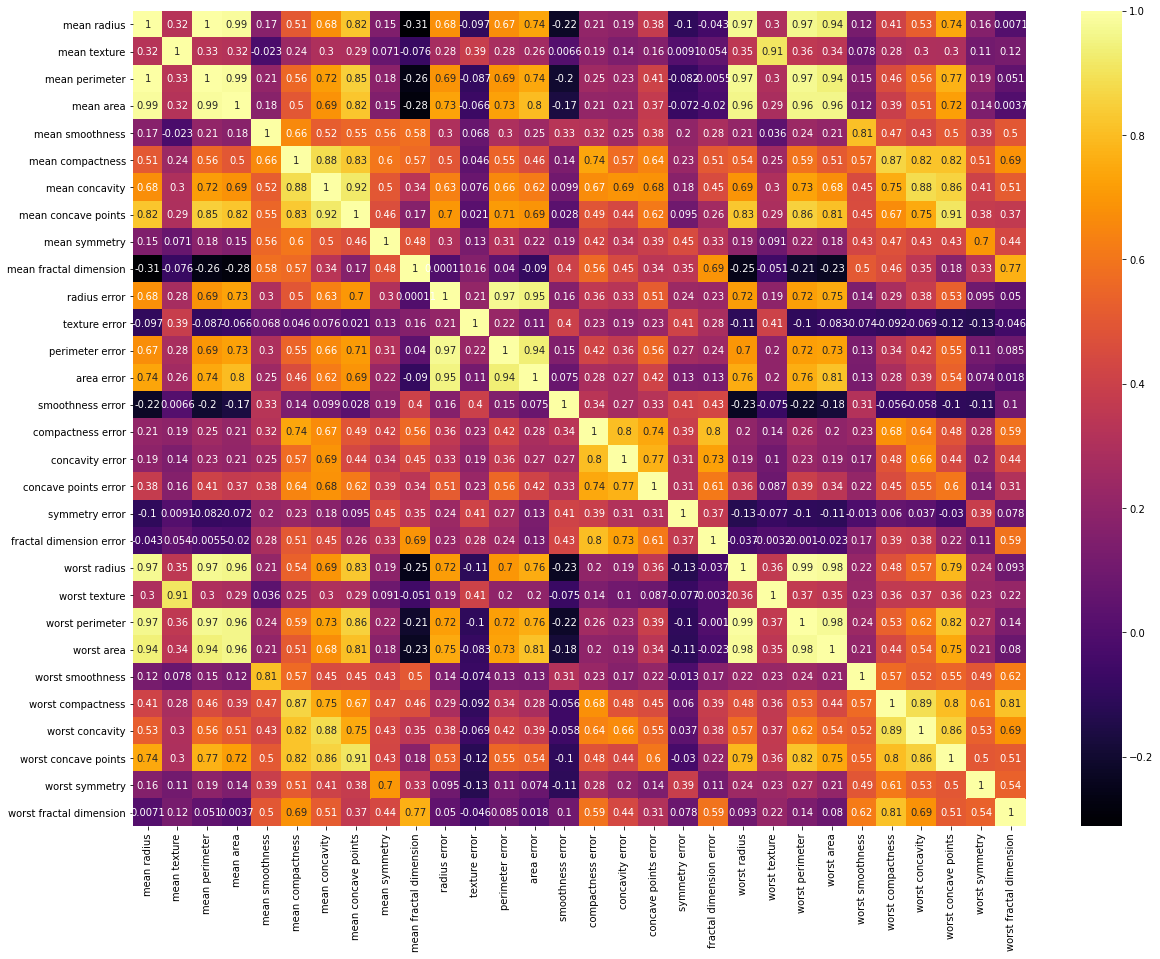

In [14]:
# 상관계수를 확인한다
plt.figure(figsize=(20,15))
cor = df_cancer.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.inferno)
plt.show()

## Splitting Data

validation, test를 하기 위해 10%는 validation으로, 20%는 test로 활용한다.

In [15]:
X, y = load_breast_cancer(return_X_y=True)

In [16]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=42, stratify=y_trainval)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, sep='\n')

(398, 30)
(57, 30)
(114, 30)


## Training Model -without RFE

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [20]:
# DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=36)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [21]:
# RandomForestClassifier


random_forest = RandomForestClassifier(random_state=36)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



In [22]:
# SupportVectorClassifier


svm_model = svm.SVC(random_state=36)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.88      0.97      0.92        36

    accuracy                           0.89        57
   macro avg       0.91      0.87      0.88        57
weighted avg       0.90      0.89      0.89        57



In [23]:
# Stochastic Gradient Descent
# 일반적인 머신러닝 모델에 SGD 기법을 사용합니다.


sgd_model = SGDClassifier(random_state=36)
sgd_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.88      0.97      0.92        36

    accuracy                           0.89        57
   macro avg       0.91      0.87      0.88        57
weighted avg       0.90      0.89      0.89        57



In [24]:
# Logistic Regression


log_model = LogisticRegression(solver='liblinear',random_state=36)  # 작은 dataset에는 liblnear 메소드가 낫다고 한다
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.92      0.94      0.93        36

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



validation 기준으로, SGD model과 SVM model은 class_2 를 맞게 예측해내지 못하는 성능을 보여주었다. RFE를 사용하여 feature 숫자를 줄인다면 어떻게 될지 확인해보자.

## Train Model - with RFE

In [25]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [26]:
# DecisionTree pipeline
rfe = RFE(estimator=DecisionTreeClassifier(random_state=36), n_features_to_select=4)
model = DecisionTreeClassifier(random_state=36)
decision_tree_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
decision_tree_pipeline.fit(X_train, y_train)
y_pred = decision_tree_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.89      0.94      0.92        36

    accuracy                           0.89        57
   macro avg       0.89      0.88      0.88        57
weighted avg       0.89      0.89      0.89        57



In [27]:
# RandomForest pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=4)
model = RandomForestClassifier(random_state=36)
random_forest_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
random_forest_pipeline.fit(X_train, y_train)
y_pred = random_forest_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



In [28]:
# StochasticGradient pipeline
rfe = RFE(estimator=SGDClassifier(random_state=36), n_features_to_select=4)
model = SGDClassifier(random_state=36)
sgd_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
sgd_pipeline.fit(X_train, y_train)
y_pred = sgd_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



In [29]:
# LogisticRegression
rfe = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=4)
model = LogisticRegression(random_state=36, solver='liblinear')
logistic_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
logistic_pipeline.fit(X_train, y_train)
y_pred = logistic_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.90      0.97      0.93        36

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.91      0.91      0.91        57



### 성능 향상은 크지 않았다. 유방암의 경우 양성을 놓치지 않는 것이 중요하므로 recall을 metric으로 사용한다.

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score as recall
from collections import defaultdict


def get_rec(max_k=10, *, X=X_val, y=y_val):
    recs = defaultdict(list)
    for k in range(max_k):
        rfe_dt = RFE(estimator=DecisionTreeClassifier(random_state=36), n_features_to_select=k+1)
        rfe_rf = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=k+1)
        rfe_sgd = RFE(estimator=SGDClassifier(random_state=36), n_features_to_select=k+1)
        rfe_log = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=k+1)
        
        model_dt = DecisionTreeClassifier(random_state=36)
        model_rf = RandomForestClassifier(random_state=36)
        model_sgd = SGDClassifier(random_state=36)
        model_log = LogisticRegression(solver='liblinear',random_state=36)
        
        decision_tree_pipeline = Pipeline(steps=[('s',rfe_dt),('m',model_dt)])
        random_forest_pipeline = Pipeline(steps=[('s',rfe_rf),('m',model_rf)])
        sgd_pipeline = Pipeline(steps=[('s',rfe_sgd),('m',model_sgd)])
        logistic_pipeline = Pipeline(steps=[('s',rfe_log),('m',model_log)])
        
        pipelines = [decision_tree_pipeline, random_forest_pipeline, sgd_pipeline, logistic_pipeline]
        for pipeline in pipelines:
            model_fit = pipeline.fit(X_train, y_train)
            y_pred = model_fit.predict(X)
            rec = recall(y, y_pred, pos_label=0) # 0이 악성이므로 0 기준으로 평가한다.
            m = str(pipeline.steps[1][1])
            recs[m].append(rec)
    return recs

            
def plot_rec(recs, *, set_title="Validation Recall"):
    plt.figure(figsize=(15, 10))
    for key, rec_list in recs.items():
        plt.plot(range(1,len(rec_list)+1), rec_list, label=key)
    plt.title(set_title)
    plt.grid()
    plt.xlabel("Number of selected features  (k)")
    plt.legend()
    plt.show()

In [31]:
rec30 = get_rec(30)

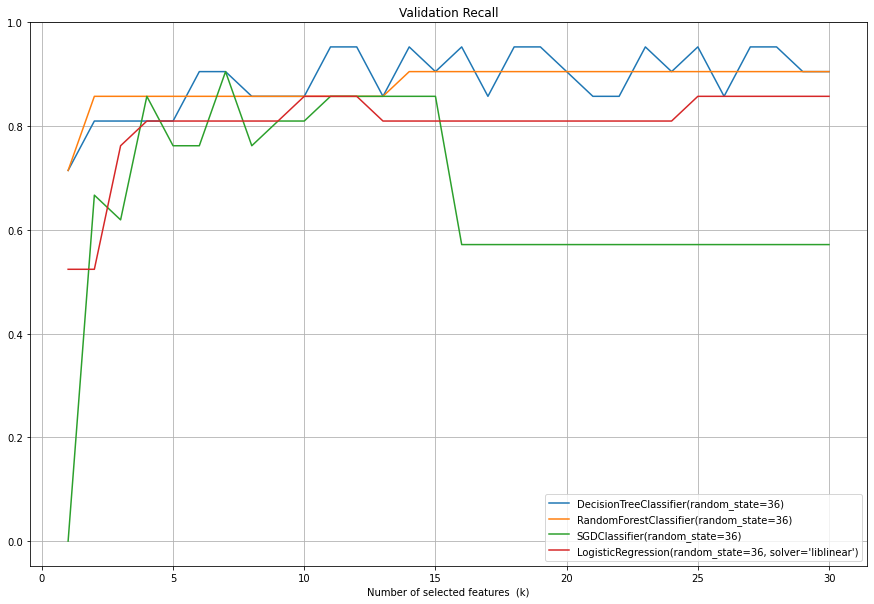

In [32]:
plot_rec(rec30)

#### 가장 일관된 성능을 보인 것은 RandomForest였다. DecisionTree는 비슷한 성능을 보였으나 variance가 커서 안정적이지 못했고, 그 다음으로는 LogisticRegression, SGD 순이었다

### 유방암 데이터셋의 경우 이진 분류이므로 ROC 곡선을 그려볼 수 있다. (LogisticRegression, num_features=10), (RandomForest, num_features=14)에 대해 수행한다

* ROC 곡선의 경우, 이진 분류에서 양성으로 판단하는 기준값(Threshold)를 바꿔가며 FPR과 TPR을 측정해 시각화한 것을 의미한다. 기준을 낮출경우, 조금이라도 양성이라고 의심되는 data를 양성으로 판단하고, 기준을 높일 경우 반대로 확실한 값만 양성으로 판정한다.

0.24.2


<Figure size 720x1152 with 0 Axes>

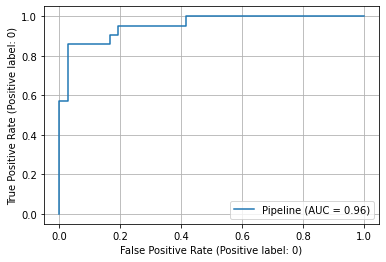

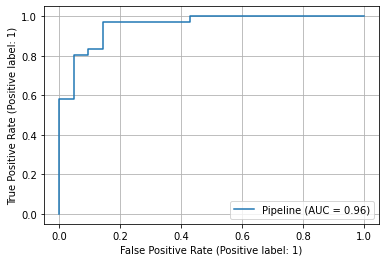

In [33]:
from sklearn.metrics import plot_roc_curve
import sklearn
print(sklearn.__version__)

# LogisticRegression
best_rfe = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=10)
best_model = LogisticRegression(random_state=36, solver='liblinear')
best_pipeline = Pipeline(steps=[('s',best_rfe),('m',best_model)])
# fit the model on all available data
best_pipeline.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 16))
for i in [0,1]:
    plot_roc_curve(best_pipeline, X_val, y_val, pos_label=i)
    plt.grid()
    plt.legend()
plt.show()

<Figure size 720x1152 with 0 Axes>

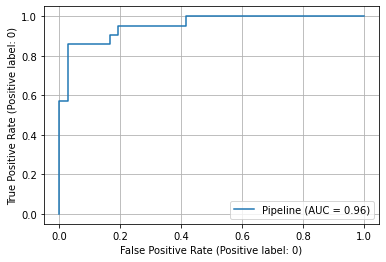

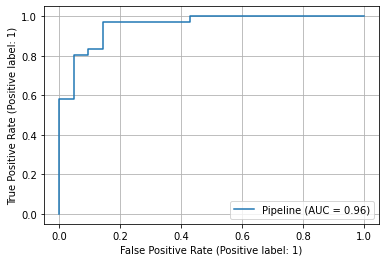

In [34]:
# RandomForest
best_rfe = RFE(estimator=LogisticRegression(solver='liblinear',random_state=36), n_features_to_select=10)
best_model = LogisticRegression(random_state=36, solver='liblinear')
best_pipeline = Pipeline(steps=[('s',best_rfe),('m',best_model)])
# fit the model on all available data
best_pipeline.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 16))
for i in [0,1]:
    plot_roc_curve(best_pipeline, X_val, y_val, pos_label=i)
    plt.grid()
    plt.legend()
plt.show()

pos_label은 어떤 class를 기준으로 할지를 설정한다. 이 경우, 양성이 0이므로 Positive label이 0인 경우를 봐야 한다.  높은 TPR에도 FPR이 낮은 모델일수록 잘 예측한 것이고, 곡선 아래 면적(AUC)로 간편하게 비교할 수 있다. 두 모델 모두 pos_label=0 인 경우 AUC=0.96을 얻었다

### RandomForest, num_features=14에 대해 classification report를 출력해본다 

In [35]:
# RandomForest pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=14)
model = RandomForestClassifier(random_state=36)
random_forest_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
random_forest_pipeline.fit(X_train, y_train)
y_pred = random_forest_pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



**0.9의 recall을 보이는 것을 확인했다. 이 모델이 가장 잘 예측할 것으로 예상한다**

## Model Test

### test_set에서는 잘 작동하는지 확인한다.

In [36]:
test_rec = get_rec(19, X=X_test, y=y_test)

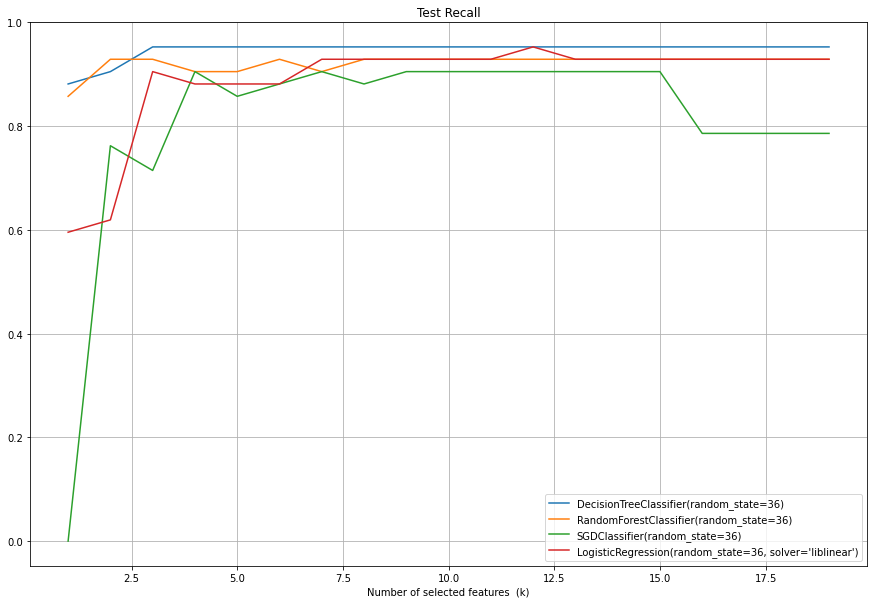

In [37]:
plot_rec(test_rec, set_title="Test Recall")

In [38]:
# RandomForest pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=14)
model = RandomForestClassifier(random_state=36)
random_forest_pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
random_forest_pipeline.fit(X_train, y_train)
y_pred = random_forest_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 0.93 의 recall을 얻었다

## 분석

* Precision: FP가 작을수록 큰 값이 나온다. 즉, 실제로 음성인데 양성으로 예측하는 경우가 적을수록 크다.
* Recall: FN이 작을수록 큰 값이 나온다. 즉, 실제로 양성인데 음성으로 예측하는 경우가 적을수록 크다.

label 0이 악성이고, 악성을 잡아내고 싶으므로 label 0에 대한 Recall을 metric으로 사용해야 한다. 
validation set 기준으로 일관된 성능을 보여준 특성 10개로 fit한 LogisticRegression과 특성 14개로 fit한 RandomForest가 성능이 좋을 것으로 예측했다. 그러나 들쭉날쭉하여 일반화 성능이 좋지 못할 것으로 생각했던 DecisionTree의 성능이 가장 일관되게 높았다.

# 결론

특성 10개로 fit한 LogisticRegression과 특성 14개로 fit한 RandomForest가 성능이 좋을 것으로 예측했다. 그러나 들쭉날쭉하여 일반화 성능이 좋지 못할 것으로 생각했던 DecisionTree의 성능이 가장 일관되게 높았다